# Example 03 - Introduction to SPaT Data

This example will introduce:

* Load the parsed Signal Phase and Timing data with `mtldp.utils.data_io`
* Basic classes for the SPaT data
* How to get SPaT information for a specific time period over a range of days at the corridor, intersection, and movement level

After the SPaT data is parsed from original CSV files, you can load the them using the data platform (`mtldp`) package. The following flow chart illustrates how the data platform loads and manages the SPaT data.  

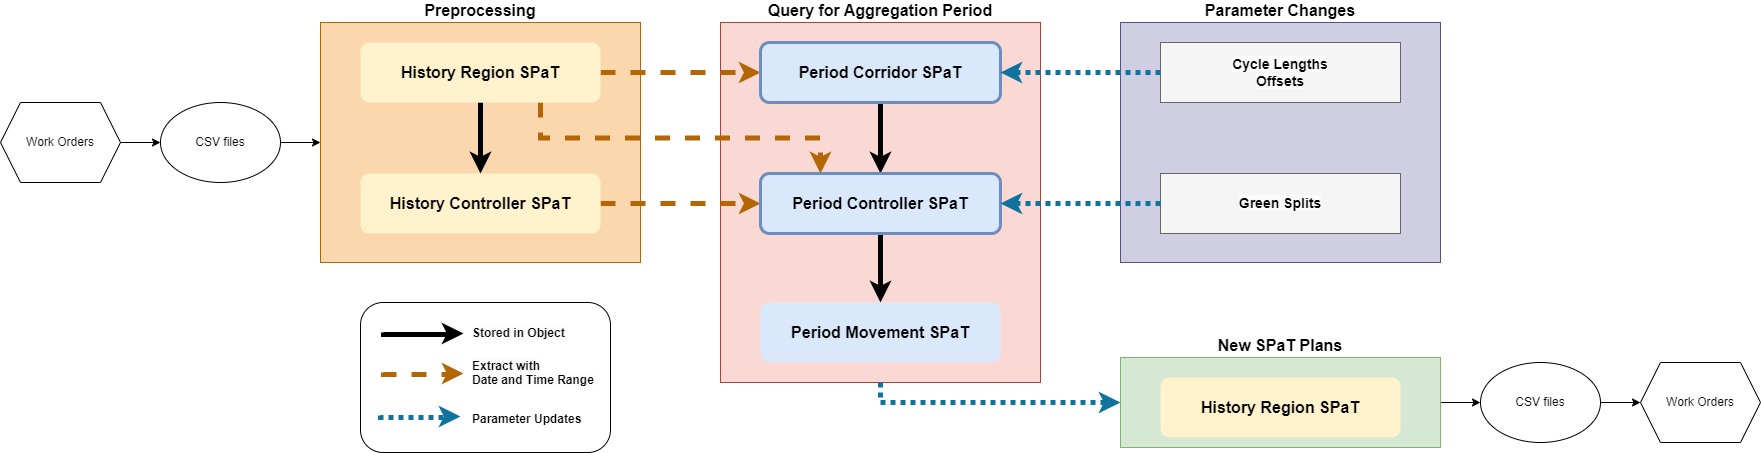

In [3]:
from mtldp.utils.common import show_attributes_and_methods

## Load SPaT data

### Load region SPaT history from pickle file

In [4]:
from mtldp.utils.data_io import load_region_spat_from_pickle

region_spat = load_region_spat_from_pickle('data/spat.pickle')

In [5]:
show_attributes_and_methods(region_spat)

attributes: {'version_history_df', 'ring_structure_df', 'region_id', 'timezone', 'tod_event_df', 'network_mapping_df', 'node_id_ls', 'node_controller_dict', 'controller_spat_history_dict', 'dial_split_df', 'program_week_df', 'program_day_df'}

methods: {'get_corridor_spat_period', 'get_controller_spat_period', 'get_controller_spat_history', 'get_tod_event_time_splits'}


### Get SPaT history of one controller from region

In [6]:
node_id = region_spat.node_id_ls[0]
controller_spat = region_spat.get_controller_spat_history(node_id=node_id)

In [7]:
show_attributes_and_methods(controller_spat)

attributes: {'version_history', 'version_history_df', 'ring_structure_df', 'phase_mappings', 'timezone', 'movement_mappings', 'tod_event_df', 'dial_split_versions', 'node_id_ls', 'tod_event_versions', 'dial_split_df', 'program_week_df', 'program_day_df', 'controller_id'}

methods: {'get_controller_spat_period', 'add_node', 'get_tod_event_time_splits', 'get_tod_event_starts'}


## Get corridor SPaT information for a time period over a range of days

In [8]:
# specify date range
date_range = ["2022-03-07", "2022-03-08", "2022-03-09", "2022-03-10", "2022-03-11"]

# corridor name
name = 'adams_rd'

# specify nodes in the corridor
node_ls = ["62183487", "62300620", "61950324", "62344947", "62344935", "62355467", "62036287"]

# get TOD splits based on all the TOD boundaries from the nodes in this node list
tod_splits = region_spat.get_tod_event_time_splits(date_range, node_ls)
print(tod_splits)

[[0.0, 6.0], [6.0, 7.0], [7.0, 10.0], [10.0, 15.0], [15.0, 15.25], [15.25, 15.667], [15.667, 19.0], [19.0, 22.0], [22.0, 24]]


In [9]:
# examine the first tod split
tod_split = tod_splits[0]

# get the corridor spat
corridor_period_spat = region_spat.get_corridor_spat_period(name, node_ls, date_range, tod_split)

 {
 "90": [
  "62183487",
  "62344947",
  "62344935",
  "62355467"
 ],
 "0": [
  "62300620",
  "61950324",
  "62036287"
 ]
}


A warning is raised because not all of the nodes have the same cycle length. Some of the nodes in this example have a flashing operation during the night hours, so the cycle is 0. This is also stored in the object.

In [10]:
print(corridor_period_spat.same_cycle_lengths)

False


Now let's get a corridor period when all the nodes have the same cycle length:

In [11]:
# examine the third tod split
tod_split = tod_splits[2]

# get the corridor spat
corridor_period_spat = region_spat.get_corridor_spat_period(name, node_ls, date_range, tod_split)

# check that cycle length is the same
print(corridor_period_spat.same_cycle_lengths)

True


In [12]:
show_attributes_and_methods(corridor_period_spat)

attributes: {'controller_spat_period_dict', 'timezone', 'date_ls', 'controller_cycle_lengths', 'corridor_id', 'node_id_ls', 'cycle_length', 'node_controller_dict', 'node_offsets', 'time_range', 'same_cycle_lengths'}

methods: {'get_movement_spat_period', 'get_controller_spat_period'}


In [13]:
corridor_period_spat.node_offsets

{'62183487': 37,
 '62300620': 40,
 '61950324': 89,
 '62344947': 35,
 '62344935': 35,
 '62355467': 78,
 '62036287': 69}

### Get the period SPaT information for a node in the corridor

In [14]:
intersection_id = corridor_period_spat.node_id_ls[0]

controller_period_spat = corridor_period_spat.get_controller_spat_period(intersection_id)

show_attributes_and_methods(controller_period_spat)

attributes: {'next_phases', 'clearance_intervals', 'yellow_intervals', 'shift', 'controller_id', 'version_history', 'phase_mappings', 'ring_structure_df', 'movement_spat_period_dict', 'fixed_ends', 'date_ls', 'tod_events', 'phase_modes', 'node_id_ls', 'program_weeks', 'ring_phases', 'ped_channels', 'dial_splits', 'cycle', 'timezone', 'movement_mappings', 'fixed_starts', 'concurrent_phases', 'phase_starts', 'offset', 'program_days', 'channels', 'phase_splits', 'min_splits', 'time_range'}

methods: {'get_movement_spat_period'}


### Get the period SPaT information for a movement in the corridor

In [16]:
# examine the SB movement
movement_index = 8

You can either retrieve the movement information from either the corridor or controller level

In [17]:
movement_period_spat_from_corridor = corridor_period_spat.get_movement_spat_period(node_id, movement_index)

movement_period_spat_from_controller = controller_period_spat.get_movement_spat_period(node_id, movement_index)

movement_period_spat_from_corridor == movement_period_spat_from_controller

False

In [19]:
movement_period_spat = movement_period_spat_from_corridor

movement_period_spat.__dict__

{'movement_id': None,
 'movement_index': 8,
 'phase_ls': [2],
 'fx_end': True,
 'fx_start': True,
 'green_start': 89,
 'green_duration': 60,
 'yellow': 3.5,
 'clearance': 2.5}

The movement id needs to be matched from the map data 

## Get intersection SPaT information for a time period over a range of days

You can also get an intersection's SPaT information for a time period directly from the controller history

In [20]:
tod_splits = controller_spat.get_tod_event_time_splits(date_range)

print(tod_splits)

[[0.0, 7.0], [7.0, 10.0], [10.0, 15.0], [15.0, 15.25], [15.25, 15.667], [15.667, 19.0], [19.0, 22.0], [22.0, 24]]


It is recommended that you call the controller SPaT period within these tod splits. Otherwise an error might be raised because of incompatible parameters.

In [21]:
# try a different tod split
tod_split = [6, 8]

controller_period_spat = controller_spat.get_controller_spat_period(date_range, tod_split)

[
 [
  0.0,
  7.0
 ],
 [
  7.0,
  10.0
 ]
]
[
 [
  0.0,
  7.0
 ],
 [
  7.0,
  10.0
 ]
]
[
 [
  0.0,
  7.0
 ],
 [
  7.0,
  10.0
 ]
]
[
 [
  0.0,
  7.0
 ],
 [
  7.0,
  10.0
 ]
]
[
 [
  0.0,
  7.0
 ],
 [
  7.0,
  10.0
 ]
]
{
 "5:5": [
  "2022-03-07_0.0-7.0",
  "2022-03-08_0.0-7.0",
  "2022-03-09_0.0-7.0",
  "2022-03-10_0.0-7.0",
  "2022-03-11_0.0-7.0"
 ],
 "2:1": [
  "2022-03-07_7.0-10.0",
  "2022-03-08_7.0-10.0",
  "2022-03-09_7.0-10.0",
  "2022-03-10_7.0-10.0",
  "2022-03-11_7.0-10.0"
 ]
}


Exception: FATAL: date range includes more than one timing parameter set (phase splits, cycle, offset, phase modes) for time interval [6, 8] for controller 348 (nodes: ['61950324'])  
{
 "{'phase_splits': {1: -1, 2: 0, 3: -1, 4: 0, 5: -1, 6: -1, 7: -1, 8: -1}, 'cycle': 0, 'offset': 0, 'phase_modes': {1: -1, 2: 8, 3: -1, 4: 9, 5: -1, 6: -1, 7: -1, 8: -1}}": [
  "5:5"
 ],
 "{'phase_splits': {1: -1, 2: 60, 3: -1, 4: 30, 5: -1, 6: -1, 7: -1, 8: -1}, 'cycle': 90, 'offset': 89, 'phase_modes': {1: -1, 2: 1, 3: -1, 4: 7, 5: -1, 6: -1, 7: -1, 8: -1}}": [
  "2:1"
 ]
}

In this case, there are different cycle lengths within this time range, so 6:00 AM to 8:00 AM is not a viable TOD split for this date range.

In [22]:
# try a TOD split within the ones generated before
tod_split = [8.5, 9.5]

controller_period_spat = controller_spat.get_controller_spat_period(date_range, tod_split)

In [23]:
show_attributes_and_methods(controller_period_spat)

attributes: {'next_phases', 'clearance_intervals', 'yellow_intervals', 'shift', 'controller_id', 'version_history', 'phase_mappings', 'ring_structure_df', 'movement_spat_period_dict', 'fixed_ends', 'date_ls', 'tod_events', 'phase_modes', 'node_id_ls', 'program_weeks', 'ring_phases', 'ped_channels', 'dial_splits', 'cycle', 'timezone', 'movement_mappings', 'fixed_starts', 'concurrent_phases', 'phase_starts', 'offset', 'program_days', 'channels', 'phase_splits', 'min_splits', 'time_range'}

methods: {'get_movement_spat_period'}


In [24]:
controller_period_spat.phase_starts

{2: 0, 4: 60}